# Predi√ß√£o de Sa√≠da de Funcion√°rios com Regress√£o Log√≠stica

## 1. Introdu√ß√£o do Projeto
- Objetivo: Prever a sa√≠da de funcion√°rios com base em vari√°veis de perfil e comportamento, usando Regress√£o Log√≠stica.
- Aplica√ß√£o: Identificar colaboradores em risco e ajudar o RH na reten√ß√£o proativa.

## 2. Dicion√°rio de Dados

| Vari√°vel                          | Descri√ß√£o                                                                     |
|----------------------------------|-------------------------------------------------------------------------------|
| **ID**                           | Matr√≠cula do funcion√°rio                                                      |
| **Funcion√°rio_deixou_a_empresa** | Marca√ß√£o se o funcion√°rio deixou a empresa recentemente                      |
| **Idade**                        | Idade do funcion√°rio                                                          |
| **Frequ√™ncia de Viagens**        | Frequ√™ncia de viagens a trabalho do funcion√°rio                               |
| **Dist√¢ncia_do_trabalho**        | Dist√¢ncia em Km at√© o trabalho                                                |
| **Forma√ß√£o**                     | N√≠vel de forma√ß√£o                                                             |
| **E-Sat**                       | Satisfa√ß√£o com o clima organizacional                                         |
| **G√™nero**                      | G√™nero do funcion√°rio                                                         |
| **Estado_Civil**                | Estado civil do funcion√°rio                                                   |
| **Sal√°rio**                     | Sal√°rio mensal                                                                |
| **Quant. de Empresas Trabalhadas** | Quantidade de empresas que o funcion√°rio j√° trabalhou                         |
| **Faz_hora_extras**             | Se funcion√°rio costuma fazer hora extra                                       |
| **Equilibrio_de_Vida**          | Nota que o funcion√°rio deu para seu equil√≠brio entre vida pessoal e profissional|
| **Tempo_de_empresa**            | Tempo em anos que o funcion√°rio trabalha na empresa                           |

## 3. Importa√ß√£o e Limpeza de Dados

In [1]:
# Visualiza√ß√£o e tratamento dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem
from sklearn.linear_model import LogisticRegression

# M√©tricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats

In [2]:
df = pd.read_excel('../dados/rh.xlsx')
df.head()

ID Funcion√°rio_deixou_a_empresa  Idade Frequ√™ncia de Viagens  \
0   1                          Sim     41       Viaja raramente   
1   2                          N√£o     49  Viaja frequentemente   
2   3                          Sim     37       Viaja raramente   
3   4                          N√£o     33  Viaja frequentemente   
4   5                          N√£o     27       Viaja raramente   

   Dist√¢ncia_do_trabalho        Forma√ß√£o       E-Sat G√™nero Estado_Civil  \
0                      1  Ensino T√©cnico       M√©dio      M     Solteiro   
1                      8    Ensino M√©dio        Alto      H       Casado   
2                      2  Ensino T√©cnico  Muito Alto      H     Solteiro   
3                      3        Mestrado  Muito Alto      M       Casado   
4                      2    Ensino M√©dio       Baixo      H       Casado   

   Sal√°rio  Qte_Empresas_Trabalhadas Faz_hora_extras? Equilibrio_de_Vida  \
0     5993                         8              Sim               Ruim   
1     5130                         1              N√£o          Muito bom   
2     2090                         6              Sim          Muito bom   
3     2909                         1              Sim          Muito bom   
4     3468                         9              N√£o          Muito bom   

   Tempo_de_empresa  
0                 6  
1                10  
2                 0  
3                 8  
4                 2

In [3]:
# Exclus√£o de colunas que n√£o ser√£o utilizadas no modelo
df = df.drop(columns=['ID', 'Equilibrio_de_Vida', 'E-Sat', 'Estado_Civil', 'Frequ√™ncia de Viagens'])

# Primeiras 5 linhas do DataFrame
df.head()

Funcion√°rio_deixou_a_empresa  Idade  Dist√¢ncia_do_trabalho        Forma√ß√£o  \
0                          Sim     41                      1  Ensino T√©cnico   
1                          N√£o     49                      8    Ensino M√©dio   
2                          Sim     37                      2  Ensino T√©cnico   
3                          N√£o     33                      3        Mestrado   
4                          N√£o     27                      2    Ensino M√©dio   

  G√™nero  Sal√°rio  Qte_Empresas_Trabalhadas Faz_hora_extras?  Tempo_de_empresa  
0      M     5993                         8              Sim                 6  
1      H     5130                         1              N√£o                10  
2      H     2090                         6              Sim                 0  
3      M     2909                         1              Sim                 8  
4      H     3468                         9              N√£o                 2

In [4]:
# Visualiza√ß√£o das informa√ß√µes de cada vari√°vel
df.info() # Aparentemente, nenhum valor missing na base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Funcion√°rio_deixou_a_empresa  1470 non-null   object
 1   Idade                         1470 non-null   int64 
 2   Dist√¢ncia_do_trabalho         1470 non-null   int64 
 3   Forma√ß√£o                      1470 non-null   object
 4   G√™nero                        1470 non-null   object
 5   Sal√°rio                       1470 non-null   int64 
 6   Qte_Empresas_Trabalhadas      1470 non-null   int64 
 7   Faz_hora_extras?              1470 non-null   object
 8   Tempo_de_empresa              1470 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 103.5+ KB


In [5]:
# Visualiza√ß√£o do n√∫mero de linhas (1470) e colunas (9)
df.shape

(1470, 9)

In [6]:
df.isnull().sum()

Funcion√°rio_deixou_a_empresa    0
Idade                           0
Dist√¢ncia_do_trabalho           0
Forma√ß√£o                        0
G√™nero                          0
Sal√°rio                         0
Qte_Empresas_Trabalhadas        0
Faz_hora_extras?                0
Tempo_de_empresa                0
dtype: int64

In [7]:
# Valores estat√≠sticos
df.describe()

Idade  Dist√¢ncia_do_trabalho       Sal√°rio  \
count  1470.000000            1470.000000   1470.000000   
mean     36.923810               9.192517   6502.931293   
std       9.135373               8.106864   4707.956783   
min      18.000000               1.000000   1009.000000   
25%      30.000000               2.000000   2911.000000   
50%      36.000000               7.000000   4919.000000   
75%      43.000000              14.000000   8379.000000   
max      60.000000              29.000000  19999.000000   

       Qte_Empresas_Trabalhadas  Tempo_de_empresa  
count               1470.000000       1470.000000  
mean                   2.693197          7.008163  
std                    2.498009          6.126525  
min                    0.000000          0.000000  
25%                    1.000000          3.000000  
50%                    2.000000          5.000000  
75%                    4.000000          9.000000  
max                    9.000000         40.000000

## 4. Engenharia de Vari√°veis

In [8]:
# Identifica√ß√£o das colunas categ√≥ricas
colunas_categoricas = [
    'Faz_hora_extras?',
    'Forma√ß√£o',
    'G√™nero',
    'Funcion√°rio_deixou_a_empresa'  # vari√°vel resposta
]

# Visualiza√ß√£o do n√∫mero de op√ß√µes de cada vari√°vel categ√≥rica
df[colunas_categoricas].nunique()

Faz_hora_extras?                2
Forma√ß√£o                        5
G√™nero                          2
Funcion√°rio_deixou_a_empresa    2
dtype: int64

In [9]:
# Lista de op√ß√µes de cada vari√°vel categ√≥rica
for coluna in colunas_categoricas:
    categorias = df[coluna].unique()
    print(f"{coluna} -> {categorias}")

Faz_hora_extras? -> ['Sim' 'N√£o']
Forma√ß√£o -> ['Ensino T√©cnico' 'Ensino M√©dio' 'Mestrado' 'Ensino Superior' 'Doutorado']
G√™nero -> ['M' 'H']
Funcion√°rio_deixou_a_empresa -> ['Sim' 'N√£o']


In [10]:
# Defini√ß√£o dos valores de cada vari√°vel categ√≥rica ordinal
formacao_ordinal = {
    'Ensino T√©cnico': 1,
    'Ensino M√©dio': 2,
    'Mestrado': 3,
    'Ensino Superior': 4,
    'Doutorado': 5
}

# Codifica√ß√£o ordinal
df['Forma√ß√£o'] = df['Forma√ß√£o'].map(formacao_ordinal)

# Defini√ß√£o dos valores das vari√°veis bin√°rias
df['Funcion√°rio_deixou_a_empresa'] = df['Funcion√°rio_deixou_a_empresa'].map({'Sim': 1, 'N√£o': 0})
df['Faz_hora_extras?'] = df['Faz_hora_extras?'].map({'Sim': 1, 'N√£o': 0})
df['G√™nero'] = df['G√™nero'].map({'H': 1, 'M': 0})

In [11]:
# Visualiza√ß√£o das 5 primeiras linhas do DataFrame
df.head()

Funcion√°rio_deixou_a_empresa  Idade  Dist√¢ncia_do_trabalho  Forma√ß√£o  \
0                             1     41                      1         1   
1                             0     49                      8         2   
2                             1     37                      2         1   
3                             0     33                      3         3   
4                             0     27                      2         2   

   G√™nero  Sal√°rio  Qte_Empresas_Trabalhadas  Faz_hora_extras?  \
0       0     5993                         8                 1   
1       1     5130                         1                 0   
2       1     2090                         6                 1   
3       0     2909                         1                 1   
4       1     3468                         9                 0   

   Tempo_de_empresa  
0                 6  
1                10  
2                 0  
3                 8  
4                 2

In [12]:
# Percentual dos funcion√°rios que deixaram a empresa
df.Funcion√°rio_deixou_a_empresa.mean() # 16% dos funcion√°rios da base deixaram a empresa

0.16122448979591836

In [13]:
# Visualiza√ß√£o do n√∫mero de linhas (1470) e colunas (9)
df.shape

(1470, 9)

##  5. An√°lise Explorat√≥ria

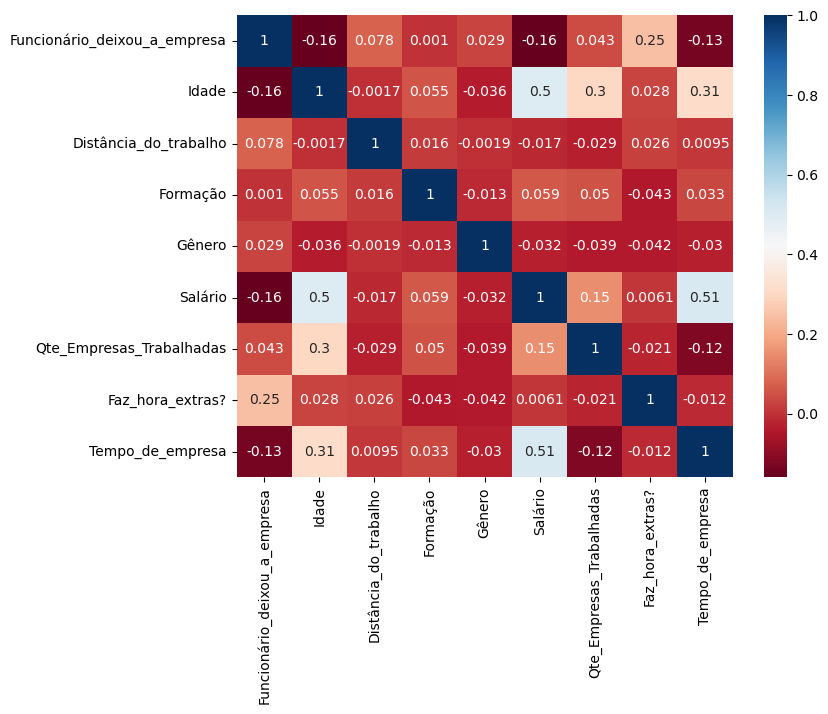

In [14]:
# Plotagem do gr√°fico de correla√ß√£o
plt.figure(figsize=(8,6)) # Ajusta o tamanho da figura
sns.heatmap(df.corr(), cmap='RdBu', annot=True); # Troca a cor e coloca o valor da correla√ß√£o dentro da matriz

#### Pouca correla√ß√£o entre as vari√°veis. √â prov√°vel que o modelo n√£o sofra com problemas de multicolinearidade.

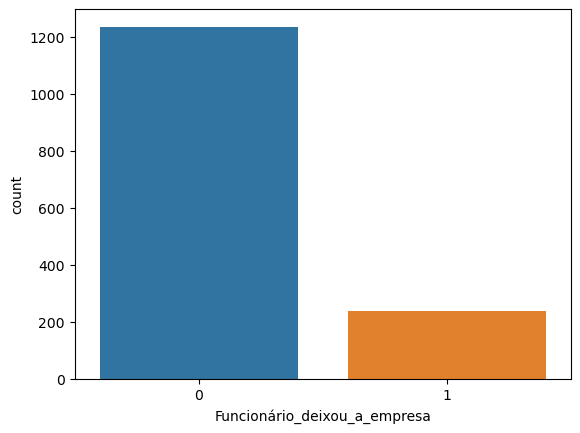

In [15]:
sns.countplot(x='Funcion√°rio_deixou_a_empresa', data=df);

## 6. Separa√ß√£o em Treino e Teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.drop(columns=['Funcion√°rio_deixou_a_empresa'])
y = df['Funcion√°rio_deixou_a_empresa']

In [18]:
x.head()

Idade  Dist√¢ncia_do_trabalho  Forma√ß√£o  G√™nero  Sal√°rio  \
0     41                      1         1       0     5993   
1     49                      8         2       1     5130   
2     37                      2         1       1     2090   
3     33                      3         3       0     2909   
4     27                      2         2       1     3468   

   Qte_Empresas_Trabalhadas  Faz_hora_extras?  Tempo_de_empresa  
0                         8                 1                 6  
1                         1                 0                10  
2                         6                 1                 0  
3                         1                 1                 8  
4                         9                 0                 2

In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Funcion√°rio_deixou_a_empresa, dtype: int64

In [20]:
# Particiona a base em 70% para Treino e 30% para Teste
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=50)

## 7. Treinamento do Modelo

In [21]:
modelo = LogisticRegression(max_iter=500, random_state=42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

## 8. Avalia√ß√£o do Modelo (C√°lculo do AUC)

In [22]:
y_pred = modelo.predict(X_train)
y_prob = modelo.predict_proba(X_train)[:, 1]

print("AUC:", roc_auc_score(y_train, y_prob))
# print(classification_report(y_train, y_pred))

AUC: 0.7437839422580241


In [23]:
# Teste
prob_test = modelo.predict_proba(X_test)[:,1]
roc_test = roc_auc_score(y_test, prob_test)
print("AUC em Teste:", roc_test)

AUC em Teste: 0.7755614769699277


## 9. Ajuste de Threshold (Ex: 0.25)

## üîç Avalia√ß√£o do Modelo na Base de Teste

In [24]:
# Previs√µes na base de teste
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

### üìâ Matriz de Confus√£o (threshold padr√£o = 0.5)

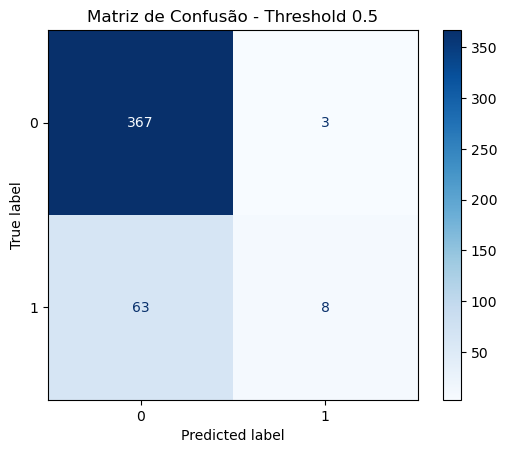

In [25]:
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Matriz de Confus√£o - Threshold 0.5')
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.73      0.11      0.20        71

    accuracy                           0.85       441
   macro avg       0.79      0.55      0.56       441
weighted avg       0.83      0.85      0.80       441



### üìâ Matriz de Confus√£o com Threshold Ajustado (0.25)

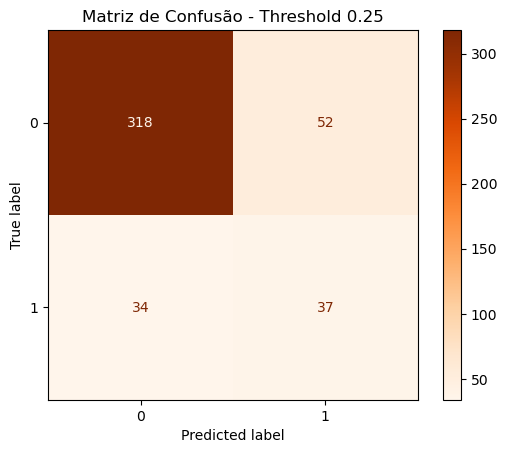

In [27]:
threshold = 0.25
y_pred_thresh = np.where(y_prob > threshold, 1, 0)
matriz_thresh = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_thresh, display_labels=[0, 1])
disp.plot(cmap='Oranges')
plt.title('Matriz de Confus√£o - Threshold 0.25')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       370
           1       0.42      0.52      0.46        71

    accuracy                           0.80       441
   macro avg       0.66      0.69      0.67       441
weighted avg       0.82      0.80      0.81       441



### üìà Curva ROC

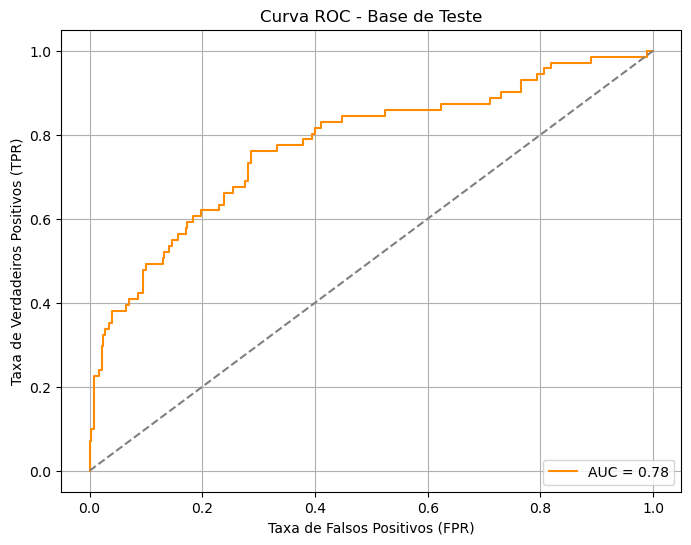

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - Base de Teste')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## üìä 4. An√°lise Explorat√≥ria (EDA)

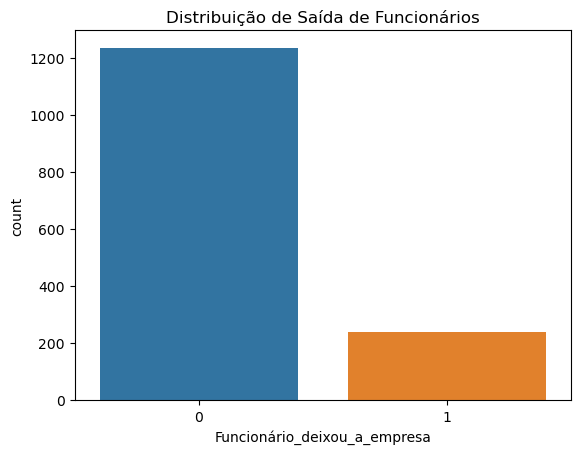

In [31]:
# Distribui√ß√£o das sa√≠das
sns.countplot(x='Funcion√°rio_deixou_a_empresa', data=df)
plt.title('Distribui√ß√£o de Sa√≠da de Funcion√°rios')
plt.show()

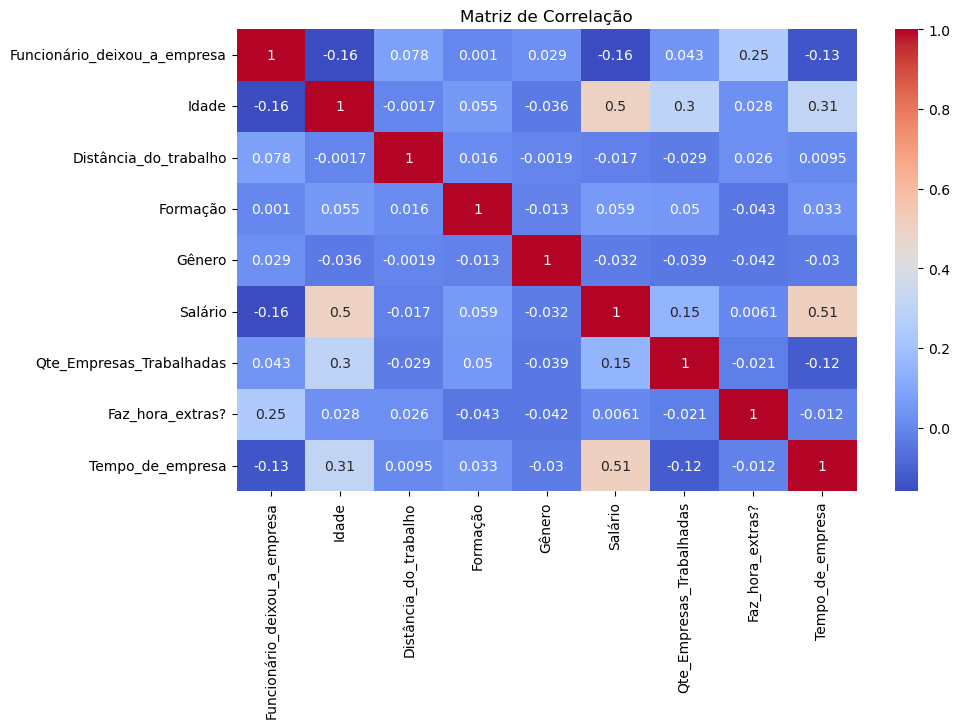

In [32]:
# Correla√ß√£o entre vari√°veis num√©ricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correla√ß√£o')
plt.show()

## üß™ 10. Compara√ß√£o AUC Treino x Teste

In [33]:
# Calcular AUC na base de treino para verificar overfitting
train_prob = modelo.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)

print("AUC Treino:", train_auc)
print("AUC Teste:", roc_auc_score(y_test, y_prob))

AUC Treino: 0.7437839422580241
AUC Teste: 0.7755614769699277


## üìã 11. Lista de Funcion√°rios Ativos com Alta Probabilidade de Sa√≠da

In [34]:
# Adicionar coluna com probabilidade ao DataFrame de teste
X_test_copy = X_test.copy()
X_test_copy['Probabilidade_de_Saida'] = y_prob
X_test_copy['Funcion√°rio_deixou_a_empresa'] = y_test.values

# Filtrar funcion√°rios ativos
ativos = X_test_copy[X_test_copy['Funcion√°rio_deixou_a_empresa'] == 0]
ativos_ordenados = ativos.sort_values(by='Probabilidade_de_Saida', ascending=False)

# Visualizar top 10 em risco
ativos_ordenados.head(10)

Idade  Dist√¢ncia_do_trabalho  Forma√ß√£o  G√™nero  Sal√°rio  \
1422     35                     11         3       1     2660   
1436     21                      5         2       1     2380   
38       36                      5         3       0     3419   
889      27                     14         4       1     2235   
284      26                     11         1       1     4741   
380      24                     10         3       0     4260   
865      30                     29         3       1     4115   
717      27                     16         3       0     2811   
912      26                      4         1       1     2875   
602      30                      2         4       0     6877   

      Qte_Empresas_Trabalhadas  Faz_hora_extras?  Tempo_de_empresa  \
1422                         7                 1                 2   
1436                         1                 1                 2   
38                           9                 1                 1   
889                          1                 1                 9   
284                          1                 1                 5   
380                          1                 1                 5   
865                          8                 0                 4   
717                          9                 0                 2   
912                          1                 1                 8   
602                          5                 1                 0   

      Probabilidade_de_Saida  Funcion√°rio_deixou_a_empresa  
1422                0.527671                             0  
1436                0.506599                             0  
38                  0.504258                             0  
889                 0.424010                             0  
284                 0.423836                             0  
380                 0.418831                             0  
865                 0.400655                             0  
717                 0.397228                             0  
912                 0.384605                             0  
602                 0.375789                             0

## 12. Conclus√£o Final
- O modelo foi treinado com regress√£o log√≠stica e apresentou AUC de aproximadamente 0.74 na base de teste.
- Ap√≥s an√°lise, vimos que o threshold padr√£o (0.5) apresentava baixo recall para a classe de sa√≠da.
- Ajustamos para 0.25, o que aumentou a captura de quem realmente saiu.
- O modelo pode ser √∫til para o RH priorizar a√ß√µes preventivas com base em risco predito.
- Recomenda-se:
  - Testar outros modelos (Random Forest, XGBoost)
  - Usar valida√ß√£o cruzada
  - Reavaliar o threshold ideal com business stakeholders